# Plotly Plot

In [2]:
import dash
from dash import html, dcc

# This is only needed to that we can run dash in a notebook
from jupyter_dash import JupyterDash
import plotly
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(color_codes=True)

In [3]:
import plotly.express as px

# Load Data

In [4]:
iris = sns.load_dataset("iris")
flights = sns.load_dataset("flights")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Plotly.express

### Bar plot

In [5]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

### Scatter Plot

In [6]:
px.scatter(x=flights.index, y=flights.passengers)

In [7]:
px.scatter(iris, x="sepal_width", y="sepal_length")

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

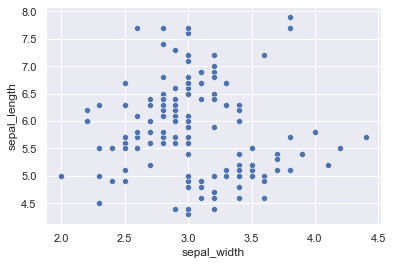

In [8]:
sns.scatterplot(data=iris, x="sepal_width", y="sepal_length")

#### Color parameter

In [9]:
px.scatter(iris, x="sepal_width", y="sepal_length", color="species")

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

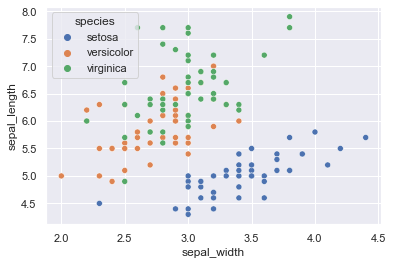

In [10]:
sns.scatterplot(x="sepal_width", y="sepal_length", data=iris, hue="species")

#### size parameter and hover data
Totally 4 dimensions with more hover data

In [11]:
px.scatter(iris, x="sepal_width", y="sepal_length", color="species", 
           size="petal_length", hover_data=['petal_width'])

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

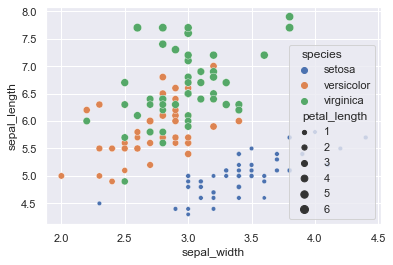

In [12]:
sns.scatterplot(x="sepal_width", y="sepal_length", data=iris, hue="species", size="petal_length")

#### Color category vs Color continuous

In [13]:
px.scatter(iris, x="sepal_width", y="sepal_length", color="petal_length")

#### Symbol

In [14]:
px.scatter(iris, x="sepal_width", y="sepal_length", color="petal_length", symbol="species")

#### Facetting

In [15]:
tips = sns.load_dataset("tips")
tips = px.data.tips()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
px.scatter(tips, x="total_bill", y="tip", color="smoker", facet_col="sex", facet_row="time")

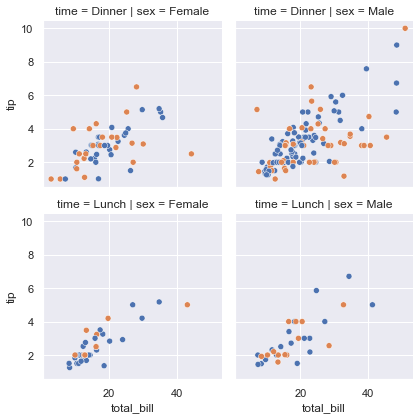

In [17]:
g = sns.FacetGrid(data=tips, row="time", col="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip", hue="smoker")

#### Linear Regression line

In [18]:
px.scatter(tips, x="total_bill", y="tip", trendline="ols")

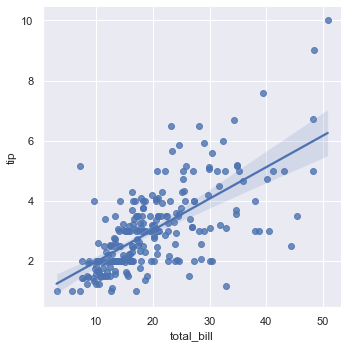

In [19]:
sns.lmplot(data=tips, x="total_bill", y="tip")

## Line Plot: px.line

In [20]:
t = np.linspace(0, 2*np.pi, 100)
px.line(x=t, y=np.cos(t), labels={'x':'t', 'y':'cos(t)'})

Text(0, 0.5, 'cos(t)')

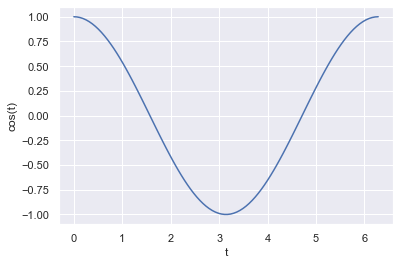

In [21]:
sns.lineplot(x=t, y=np.cos(t))
plt.xlabel("t")
plt.ylabel("cos(t)")

### markers = True

In [22]:
df = px.data.gapminder().query("continent == 'Oceania'")
px.line(df, x='year', y='lifeExp', color='country', markers=True)

<AxesSubplot:xlabel='year', ylabel='lifeExp'>

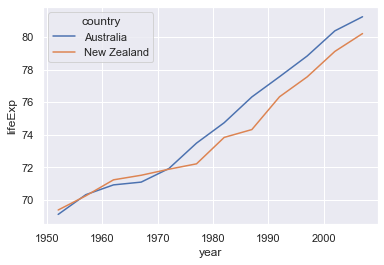

In [23]:
sns.lineplot(data=df, x="year", y="lifeExp", hue="country")

# plotly.graph: go

In [24]:
import plotly.graph_objects as go 
t = np.linspace(0, 10, 100)
y = np.sin(t)
fig = go.Figure(data=go.Scatter(x=t, y=y, mode="markers"))
fig.show()

## Multiple plots in a plot

In [25]:
N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

fig = go.Figure()
# add traces 
fig.add_trace(go.Scatter(x=random_x, y=random_y0, mode='markers', name='markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1, mode='lines+markers', name='lines+markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2, mode='lines', name='lines'))

fig.show()

## mode, marker_color, text, fig.update_layout

In [26]:
data= pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv")

fig = go.Figure(data=go.Scatter(x=data['Postal'],
                                y=data['Population'],
                                mode='markers',
                                marker_color=data['Population'],
                                text=data['State'])) # hover text goes here

fig.update_layout(title='Population of USA States')
fig.show()

In [26]:
data.head()

,Rank,State,Postal,Population
0,1,Alabama,AL,4849377.0
1,2,Alaska,AK,736732.0
2,3,Arizona,AZ,6731484.0
3,4,Arkansas,AR,2966369.0
4,5,California,CA,38802500.0


In [28]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [29]:
titanic = sns.load_dataset("titanic")

In [36]:
px.violin(titanic, x="pclass", y="age", color="sex", box=True, points='all', hover_data=titanic.columns)

In [37]:
px.violin(titanic, x="pclass", y="age", color="sex", violinmode='overlay', box=True, points='all', hover_data=titanic.columns)

## Styled box plot

In [38]:
import plotly.express as px
df = px.data.tips()
fig = px.box(df, x="time", y="total_bill", color="smoker",
             notched=True, # used notched shape
             title="Box plot of total bill",
             hover_data=["day"] # add day column to hover data
            )
fig.show()

In [44]:
px.histogram(titanic, x="pclass", y="age", color="sex", title="Box Plot",)

In [46]:
px.histogram(titanic, x="age", color="pclass")

In [50]:
px.histogram(titanic, x="age", color="pclass", marginal="box")

In [57]:
px.strip(titanic, x="age", color="sex", facet_col="pclass", category_orders={"pclass":[1,2,3]})

In [63]:
px.ecdf(titanic, x="age", color="sex", marginal="histogram")

In [60]:
px.histogram(titanic, x="age")

In [61]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

x = np.random.randn(1000)
hist_data = [x]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

In [72]:
px.scatter(iris, x="sepal_width", y="sepal_length", color="species", marginal_y="violin", marginal_x="box", 
            trendline="ols", template="simple_white")

# Dash

## figures

In [27]:
import dash
from dash import dcc, html, Dash 
from jupyter_dash import JupyterDash

import plotly.graph_objects as go # or 
import plotly.express as px
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output, State

data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv")

fig1 = px.scatter(data, x="Postal", y="Population", 
                  color="Population", hover_data=["State"])
fig2 = go.Figure(go.Scatter(x=data["Postal"], y=data["Population"], mode="markers",
                            marker_color=data["Population"], text=data["State"]))

# fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

## colors

In [28]:
#%%% Colors
colors = {
    "background": "red",
    "text": "Purple"
}
style = {
    "textAlign": "center",
    "color": colors["text"]
}

## Generate table function

In [29]:
#%%% Generate table function
def generate_table(dataframe, max_rows=10):
    return html.Table([
        html.Thead(
            html.Tr([html.Th(col) for col in dataframe.columns])
        ),
        html.Tbody([
            html.Tr([
                html.Td(dataframe.iloc[i][col]) for col in dataframe.columns
            ]) for i in range(min(len(dataframe), max_rows))
        ])
    ], style={'marginLeft': 'auto', 'marginRight': 'auto'})


## Markdown Support

In [30]:
#%%% MarkDown Support 
markdown_text = '''
### Population Introduction
America is a vast country with varied population density in many areas

**This is common in big countries**
```{python}
import pandas as pd
import sklearn
# not difficult
```
### Conclusion
As a result, this is true
Good job you did
'''

## Dropdowns

In [31]:
#%%% City Dropdown
city_dropdown = html.Div(children=[
   html.Label('Dropdown'),
   dcc.Dropdown(["New York City", "Montreal", "San Francisco"], "Montreal"),
   
   html.Br(),
   html.Label("Multi-Select Dropdown"),
   dcc.Dropdown(["New York City", "Montreal", "San Francisco"], ["New York", "Montreal"], multi=True),
])

## RadioItems, Checkboxes, Text Input, Slider

In [32]:

#%%% City Widgets
city_widgets = html.Div(children=[
        html.Label("Radio Items"),
        dcc.RadioItems(["New York City", "Montreal", "San Francisco"], "Montreal"),
        html.Br(),

        html.Label('Checkboxes'),
        dcc.Checklist(['New York City', 'Montréal', 'San Francisco'],
                      ['Montréal', 'San Francisco']
        ),

        html.Br(),
        html.Label('Text Input'),
        dcc.Input(value='MTL', type='text'),

        html.Br(),
        html.Label('Slider'),
        dcc.Slider(
            min=0,
            max=9,
            marks={i: f'Label {i}' if i == 1 else str(i) for i in range(1, 6)},
            value=5,
        ),
    ], style={'padding': 10, 'flex': 1})


## dbc.Row, dbc.Col

In [33]:
row = html.Div(
    [
        dbc.Row(dbc.Col(html.Div("A single column"))),
        dbc.Row(
            [
                dbc.Col(html.Div("One of three columns")),
                dbc.Col(html.Div("One of three columns")),
                dbc.Col(html.Div("One of three columns")),
            ]
        ),
    ]
)

## App Layout Full

In [45]:
#%%% App Layout Full
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.GRID])
app = Dash(__name__, external_stylesheets=[dbc.themes.GRID])
app.layout = html.Div([
    html.H1("This is a Dash Web App", style=style),

    html.Div([ 
        dbc.Row(
            [
                dbc.Col(html.Div([dcc.Graph(figure=fig1)])),
                dbc.Col(html.Div([dcc.Graph(figure=fig1)]))
            ]
        )
    ]),
    
    html.Div(children=[
        html.Div([dcc.Graph(figure=fig1)], style={'padding': 10, 'flex': 1}),
        html.Div([dcc.Graph(figure=fig1)], style={'padding': 10, 'flex': 1}),  
        html.Div([dcc.Graph(figure=fig1)], style={'padding': 10, 'flex': 1}), 
        ], style={'display': 'flex', 'flex-direction': 'row'}),
    
    html.H3("Here are offical dropdowns side by side", style=style),
    html.Div([
    html.Div(children=[
        html.Label('Dropdown'),
        dcc.Dropdown(['New York City', 'Montréal', 'San Francisco'], 'Montréal'),

        html.Br(),
        html.Label('Multi-Select Dropdown'),
        dcc.Dropdown(['New York City', 'Montréal', 'San Francisco'],
                     ['Montréal', 'San Francisco'],
                     multi=True),

        html.Br(),
        html.Label('Radio Items'),
        dcc.RadioItems(['New York City', 'Montréal', 'San Francisco'], 'Montréal'),
    ], style={'padding': 10, 'flex': 1}),

    html.Div(children=[
        html.Label('Checkboxes'),
        dcc.Checklist(['New York City', 'Montréal', 'San Francisco'],
                      ['Montréal', 'San Francisco']
        ),

        html.Br(),
        html.Label('Text Input'),
        dcc.Input(value='MTL', type='text'),

        html.Br(),
        html.Label('Slider'),
        dcc.Slider(
            min=0,
            max=9,
            marks={i: f'Label {i}' if i == 1 else str(i) for i in range(1, 6)},
            value=5,
        ),
    ], style={'padding': 10, 'flex': 1})
], style={'display': 'flex', 'flex-direction': 'row'}),


    html.H3("Here are the dropdowns for city", style=style),
    city_dropdown,
    html.Br(), html.Br(),

    html.H3("Here are some other widgets for the city", style=style),
    city_widgets,
    html.Br(), html.Br(),

    html.H3("Here is Data Table", style=style),
    html.Div("Data table (I am a div element, how large is me)", style=style),
    generate_table(data),
    html.Br(), html.Br(),

    dcc.Markdown(children=markdown_text),
    html.Br(), html.Br(),
    html.P("I am another Paragraph. " * 3),

    html.H3("I am a h3 tag, small one", style=style),
])

## Run dependent on type of app
if str(type(app)) == "<class 'dash.dash.Dash'>":
    app.run_server(
        debug=False,
        port = 8061,
    )
else:
   app.run_server(
    mode = "inline",
    port = 8059,
    ) 


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8061/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Jun/2022 19:31:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2022 19:31:16] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2022 19:31:16] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2022 19:31:16] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2022 19:31:16] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [06/Jun/2022 19:31:16] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [06/Jun/2022 19:31:16] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 304 -
127.0.0.1 - - [06/Jun/2022 19:31:16] "GET /_dash-component-suites/dash/dcc/async-markdown.js HTTP/1.1" 304 -
127.0.0.1 - - [06/Jun/2022 19:31:16] "GET /_favicon.ico?v=2.4.1 HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2022 19:31:16] "GET /_dash-component-suites/dash/dcc/async-highlight.js HTTP/1.1" 304 -


## App Layout Callback

In [47]:
from dash import Dash, dcc, html, Input, Output

In [56]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.GRID])
app = Dash(__name__, external_stylesheets=[dbc.themes.GRID])
app.layout = html.Div([
    html.H1("This is a Dash Web App", style=style),

    html.Div([
        html.H4("Please enter your name"),
        " Input: ",
        dcc.Input(id="my-input", value="initial value", type="text", style={"width": 500}),
        html.Div(id="my-output"),
    ]),
    
    html.Div([ 
        dbc.Row(
            [
                dbc.Col(html.Div([dcc.Graph(figure=fig1)])),
                dbc.Col(html.Div([dcc.Graph(figure=fig1)]))
            ]
        )
    ]),
    
    # html.Div(children=[
    #     html.Div([dcc.Graph(figure=fig1)], style={'padding': 10, 'flex': 1}),
    #     html.Div([dcc.Graph(figure=fig1)], style={'padding': 10, 'flex': 1}),  
    #     html.Div([dcc.Graph(figure=fig1)], style={'padding': 10, 'flex': 1}), 
    #     ], style={'display': 'flex', 'flex-direction': 'row'}),

    html.H3("Here are the dropdowns for city", style=style),
    city_dropdown,
    html.Br(), html.Br(),

    html.H3("Here are some other widgets for the city", style=style),
    city_widgets,
    html.Br(), html.Br(),

    html.H3("Here is Data Table", style=style),
    html.Div("Data table (I am a div element, how large is me)", style=style),
    generate_table(data),
    html.Br(), html.Br(),

    dcc.Markdown(children=markdown_text),
    html.Br(), html.Br(),
])


@app.callback(
    Output("my-output", "children"),
    Input("my-input", "value"),
)
def updata_output_div(input_value):
    return f"Output: {input_value}"


## Run dependent on type of app
if str(type(app)) == "<class 'dash.dash.Dash'>":
    app.run_server(
        debug=False,
        port = 8062,
    )
else:
   app.run_server(
    mode = "inline",
    port = 8063,
    ) 


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8062/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Jun/2022 19:48:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2022 19:48:16] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2022 19:48:16] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2022 19:48:17] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2022 19:48:17] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2022 19:48:17] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2022 19:48:17] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2022 19:48:17] "GET /_dash-component-suites/dash/dcc/async-markdown.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2022 19:48:17] "GET /_favicon.ico?v=2.4.1 HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2022 19:48:17] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2022 